In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import os
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

plt.style.use("../config/custom_plots.mplstyle")

### Testing the impact of opinion on epidemic layer for different p and beta

```
# How the opinion affect the epidemic layer
nAgents: 10000
nSteps: 400000
nSaveSteps: 500
nRuns: 1
additionalLinksFraction: 0.01
virtualLayer: true
epidemicLayer: true
comorbidities: false
qVoterParameters:
  p: 1.0
  q: 4
epidemicLayerParameters:
  beta: 0.7 # beta = 0.1, 0.5, 0.7
  gamma: 0.3
  mu: 0.9
  kappa: 0.1
  maxInfectedTime: 10
positiveOpinionFraction: 1.0
infectedFraction: 0.1
fractionIllnessA: 0.0
fractionIllnessB: 0.0
outputFolder: simulations/test_beta_on_virtual
firstParameterRange:
  start: 0.0
  end: 1.0
  count: 10
  type: p

```


If agent has positive opinion he spends less time in infected state (increment by 2). Moreoever, it has a probability to get infected cut in half (beta_new = beta / 2).

In [7]:
def load_df(p, beta):
    path = f"../simulations/test_beta_on_virtual/test_beta_on_virtual_NAGENTS=10000_NSTEPS=400000_FRAC_LINKS=0.01_FRAC_POS_OPINION=1.0_FRAC_A=0.0_FRAC_B=0.0_FRAC_INFECTED=0.1_QVOTER=p={p}_q=4_EPIDEMIC=beta={beta}_gamma=0.30_mu=0.90_kappa=0.10_maxInfectedTime=10.00_NRUN=0.tsv"
    return pd.read_csv(path, sep="\t")

dfs = {}

ps = [f'{x:.2f}' for x in np.linspace(0, 1, 10)]
betas = ['0.10', '0.50', '0.70']

for beta in betas:
    dfs[beta] = [load_df(p, beta) for p in ps]

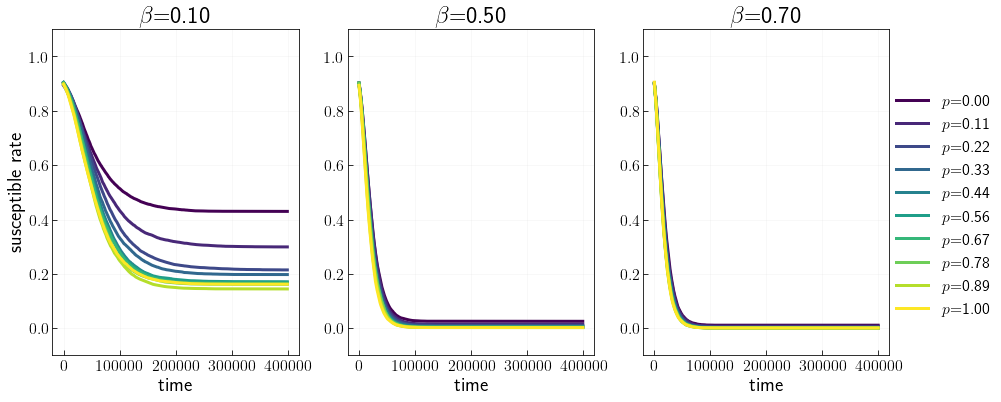

In [31]:
def print_run(dfs, col, beta, ylim=(-0.1, 1.1)):
    for i, df in enumerate(dfs):
        plt.plot(df.step, df[col], label=fr'$p$={ps[i]}', color=colormap(i))
    plt.title(r'$\beta$={}'.format(beta))
    plt.xlabel("time")
    plt.ylim(*ylim)

colormap = plt.cm.get_cmap('viridis', len(ps))

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
print_run(dfs[betas[0]], 'susceptibleRate', betas[0])
plt.ylabel('susceptible rate')

plt.subplot(1, 3, 2)
print_run(dfs[betas[1]], 'susceptibleRate', betas[1])
    
plt.subplot(1, 3, 3)
print_run(dfs[betas[2]], 'susceptibleRate', betas[2])

plt.legend(loc=(1, 0.1))

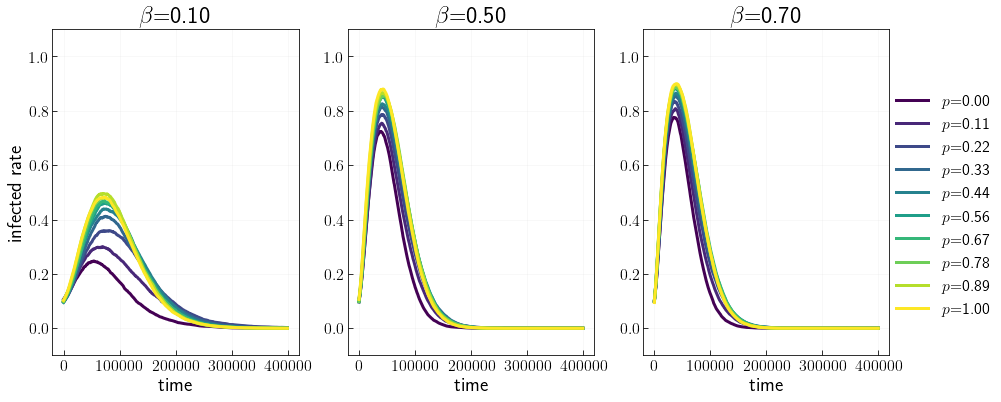

In [48]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
print_run(dfs[betas[0]], 'infectedRate', betas[0])
plt.ylabel('infected rate')

plt.subplot(1, 3, 2)
print_run(dfs[betas[1]], 'infectedRate', betas[1])
    
plt.subplot(1, 3, 3)
print_run(dfs[betas[2]], 'infectedRate', betas[2])

plt.legend(loc=(1, 0.1))

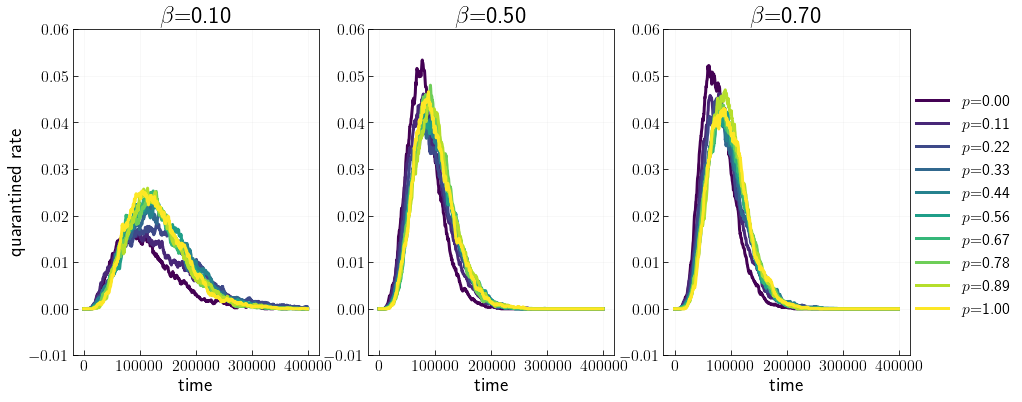

In [47]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
print_run(dfs[betas[0]], 'quarantinedRate', betas[0], ylim=(-0.01, 0.06))
plt.ylabel('quarantined rate')

plt.subplot(1, 3, 2)
print_run(dfs[betas[1]], 'quarantinedRate', betas[1], ylim=(-0.01, 0.06))

plt.subplot(1, 3, 3)
print_run(dfs[betas[2]], 'quarantinedRate', betas[2], ylim=(-0.01, 0.06))

plt.legend(loc=(1, 0.1))

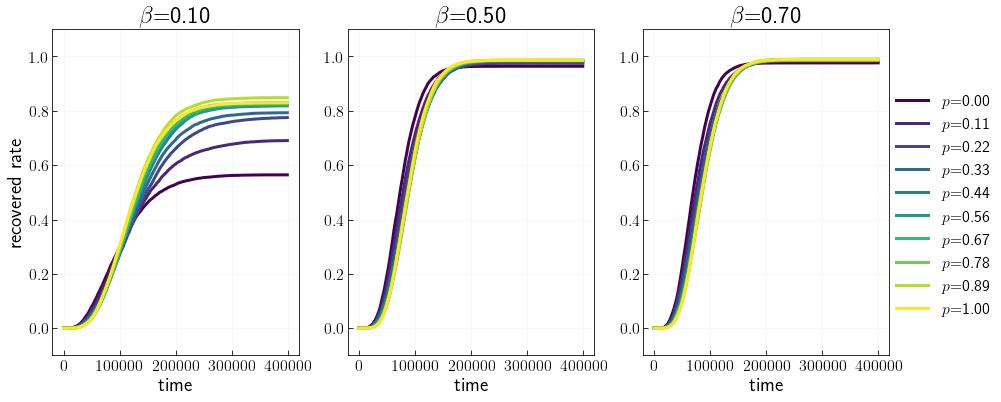

In [46]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
print_run(dfs[betas[0]], 'recoveredRate', betas[0])
plt.ylabel('recovered rate')

plt.subplot(1, 3, 2)
print_run(dfs[betas[1]], 'recoveredRate', betas[1])

plt.subplot(1, 3, 3)
print_run(dfs[betas[2]], 'recoveredRate', betas[2])

plt.legend(loc=(1, 0.1))

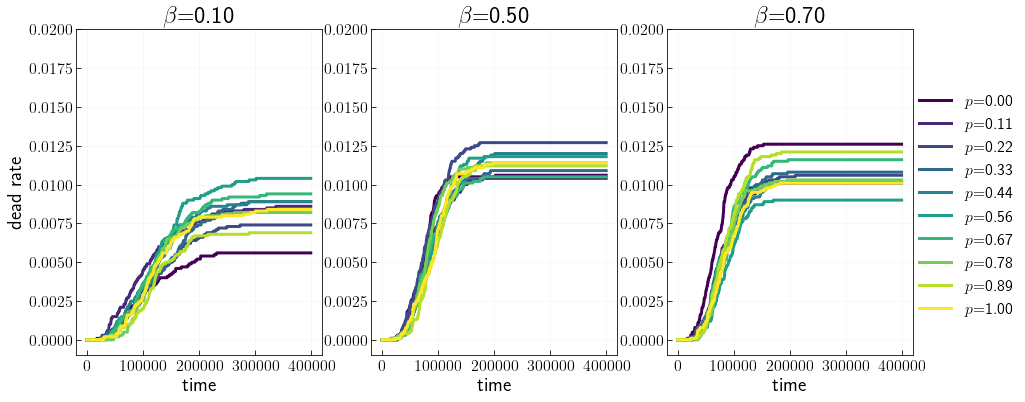

In [53]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
print_run(dfs[betas[0]], 'deadRate', betas[0], ylim=(-0.001, 0.02))
plt.ylabel('dead rate')

plt.subplot(1, 3, 2)
print_run(dfs[betas[1]], 'deadRate', betas[1], ylim=(-0.001, 0.02))

plt.subplot(1, 3, 3)
print_run(dfs[betas[2]], 'deadRate', betas[2], ylim=(-0.001, 0.02))

plt.legend(loc=(1, 0.1))